In [ ]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import re
from tqdm import tqdm
tqdm.pandas()

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
pd.set_option('display.max_columns',50)

In [ ]:
batsman_data = pd.read_csv('batsman_level_scorecard.csv')
bowler_data = pd.read_csv('bowler_level_scorecard.csv')
match_data = pd.read_csv('match_level_scorecard.csv')
train_data = pd.read_csv('train_data_with_samplefeatures.csv')
test_data = pd.read_csv('test_data_with_samplefeatures.csv')

In [ ]:
data_with_samplefeatures = pd.read_csv('667a986f0b981_r2_data_with_samplefeatures.csv')

In [ ]:
data_with_samplefeatures.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   match id                   207 non-null    int64  
 1   team1                      207 non-null    object 
 2   team1_id                   207 non-null    int64  
 3   team1_roster_ids           207 non-null    object 
 4   team2                      207 non-null    object 
 5   team2_id                   207 non-null    int64  
 6   team2_roster_ids           207 non-null    object 
 7   toss winner                207 non-null    object 
 8   toss decision              207 non-null    object 
 9   venue                      207 non-null    object 
 10  city                       207 non-null    object 
 11  match_dt                   207 non-null    object 
 12  lighting                   207 non-null    object 
 13  series_name                207 non-null    object 

In [ ]:
batsman_data_test = pd.read_csv('667a985a7541a_batsman_level_scorecard.csv')
bowler_data_test = pd.read_csv('667a98513f849_bowler_level_scorecard.csv')
match_data_test = pd.read_csv('667a9888c9104_match_level_scorecard.csv')

In [ ]:
match_data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1945 entries, 0 to 1944
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   match id                1945 non-null   int64  
 1   team1                   1945 non-null   object 
 2   team2                   1945 non-null   object 
 3   winner                  1945 non-null   object 
 4   by                      1945 non-null   object 
 5   win amount              1945 non-null   float64
 6   toss winner             1945 non-null   object 
 7   toss decision           1945 non-null   object 
 8   venue                   1945 non-null   object 
 9   city                    1767 non-null   object 
 10  match_dt                1945 non-null   object 
 11  lighting                1945 non-null   object 
 12  series_name             1945 non-null   object 
 13  season                  1945 non-null   object 
 14  ground_id               1945 non-null   

In [ ]:
match_data_test['winner_01'] = match_data_test.apply(lambda x: 1 if (x['team2']==x['winner']) else 0, axis=1)

team_run_bat', 'econ_run_ratio','team_boundary_ratio','team_count_50runs_last15','ground_winp_ratio_01'
                         ,'team_winp_last5'

In [ ]:
submission_temp = pd.read_csv('667a98661e233_submission_template_file1.csv')
submission_temp

,match id,dataset_type,win_pred_team_id,win_pred_score,train_algorithm,is_ensemble,train_hps_trees,train_hps_depth,train_hps_lr,indep_feat_id1,indep_feat_id2,indep_feat_id3,indep_feat_id4,indep_feat_id5,indep_feat_id6,indep_feat_id7,indep_feat_id8,indep_feat_id9,indep_feat_id10
0,9272619,r2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9086958,r2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9433654,r2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9097248,r2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,9097234,r2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,9984162,r2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
203,9984176,r2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
204,9984183,r2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
205,9984190,r2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
batsman_data_test.info()
batsman_data_test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28476 entries, 0 to 28475
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   match id            28476 non-null  int64  
 1   batsman             28476 non-null  object 
 2   batsman_id          28476 non-null  float64
 3   batsman_details     28476 non-null  object 
 4   is_batsman_captain  28476 non-null  float64
 5   is_batsman_keeper   28476 non-null  float64
 6   inning              28476 non-null  int64  
 7   runs                28476 non-null  int64  
 8   balls_faced         28476 non-null  int64  
 9   over_faced_first    28476 non-null  float64
 10  wicket kind         22265 non-null  object 
 11  out_by_bowler       22265 non-null  object 
 12  out_by_fielder      16045 non-null  object 
 13  bowler_id           21150 non-null  float64
 14  bowler_details      21150 non-null  object 
 15  is_bowler_keeper    21808 non-null  float64
 16  is_b

,match id,batsman,batsman_id,batsman_details,is_batsman_captain,is_batsman_keeper,inning,runs,balls_faced,over_faced_first,wicket kind,out_by_bowler,out_by_fielder,bowler_id,bowler_details,is_bowler_keeper,is_bowler_captain,strike_rate,Fours,Sixes,match_dt
0,8638034,KD Ce,7907451.0,NZ:Right-hand bat:Right-arm medium-fast:,0.0,0.0,1,7,5,1.1,caught,JS Nm,TM Jn,2486896.0,NZ:Left-hand bat:Right-arm medium-fast:,0.0,0.0,140.00,1.0,NaN,2021-01-01
1,8638034,TL St,4381761.0,NZ:Right-hand bat:None:,0.0,1.0,1,46,46,1.2,caught,R Ra,MG Bl,6718382.0,NZ:Left-hand bat:Slow left-arm orthodox:,0.0,0.0,100.00,4.0,1.0,2021-01-01
2,8638034,HR Cr,4949790.0,NZ:Right-hand bat:Right-arm offbreak:,0.0,0.0,1,9,10,12.1,caught,PF Yd,R Ra,4950294.0,NZ:Right-hand bat:Legbreak googly:,0.0,0.0,90.00,NaN,NaN,2021-01-01
3,8638034,BR Hn,3834305.0,NZ:Right-hand bat:Right-arm medium-fast:,0.0,0.0,1,28,22,13.6,caught,HK Bt,FH An,1585464.0,NZ:Left-hand bat:Right-arm medium-fast:,0.0,0.0,127.27,3.0,NaN,2021-01-01
4,8638034,SC Kn,3776849.0,NZ:Right-hand bat:Right-arm fast-medium:,0.0,0.0,1,18,13,17.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,138.46,NaN,1.0,2021-01-01


In [ ]:
batsman_data.info()
batsman_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24483 entries, 0 to 24482
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   match id            24483 non-null  int64  
 1   batsman             24483 non-null  object 
 2   batsman_id          24483 non-null  float64
 3   batsman_details     24483 non-null  object 
 4   is_batsman_captain  24483 non-null  float64
 5   is_batsman_keeper   24483 non-null  float64
 6   inning              24483 non-null  int64  
 7   runs                24483 non-null  int64  
 8   balls_faced         24483 non-null  int64  
 9   over_faced_first    24483 non-null  float64
 10  wicket kind         19155 non-null  object 
 11  out_by_bowler       19155 non-null  object 
 12  out_by_fielder      13838 non-null  object 
 13  bowler_id           18128 non-null  float64
 14  bowler_details      18128 non-null  object 
 15  is_bowler_keeper    18698 non-null  float64
 16  is_b

,match id,batsman,batsman_id,batsman_details,is_batsman_captain,is_batsman_keeper,inning,runs,balls_faced,over_faced_first,wicket kind,out_by_bowler,out_by_fielder,bowler_id,bowler_details,is_bowler_keeper,is_bowler_captain,strike_rate,Fours,Sixes,match_dt
0,8638034,KD Ce,7907451.0,NZ:Right-hand bat:Right-arm medium-fast:,0.0,0.0,1,7,5,1.1,caught,JS Nm,TM Jn,2486896.0,NZ:Left-hand bat:Right-arm medium-fast:,0.0,0.0,140.00,1.0,NaN,2021-01-01
1,8638034,TL St,4381761.0,NZ:Right-hand bat:None:,0.0,1.0,1,46,46,1.2,caught,R Ra,MG Bl,6718382.0,NZ:Left-hand bat:Slow left-arm orthodox:,0.0,0.0,100.00,4.0,1.0,2021-01-01
2,8638034,HR Cr,4949790.0,NZ:Right-hand bat:Right-arm offbreak:,0.0,0.0,1,9,10,12.1,caught,PF Yd,R Ra,4950294.0,NZ:Right-hand bat:Legbreak googly:,0.0,0.0,90.00,NaN,NaN,2021-01-01
3,8638034,BR Hn,3834305.0,NZ:Right-hand bat:Right-arm medium-fast:,0.0,0.0,1,28,22,13.6,caught,HK Bt,FH An,1585464.0,NZ:Left-hand bat:Right-arm medium-fast:,0.0,0.0,127.27,3.0,NaN,2021-01-01
4,8638034,SC Kn,3776849.0,NZ:Right-hand bat:Right-arm fast-medium:,0.0,0.0,1,18,13,17.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,138.46,NaN,1.0,2021-01-01


In [ ]:
bowler_data.info()
bowler_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18539 entries, 0 to 18538
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   match id           18539 non-null  int64  
 1   bowler             18539 non-null  object 
 2   bowler_id          18539 non-null  float64
 3   bowler_details     18539 non-null  object 
 4   is_bowler_captain  18539 non-null  float64
 5   is_bowler_keeper   18539 non-null  float64
 6   inning             18539 non-null  int64  
 7   runs               18539 non-null  int64  
 8   wicket_count       18539 non-null  int64  
 9   balls_bowled       18539 non-null  int64  
 10  economy            18539 non-null  float64
 11  maiden             18539 non-null  int64  
 12  dots               18539 non-null  float64
 13  Fours              18539 non-null  int64  
 14  Sixes              18539 non-null  int64  
 15  wides              18539 non-null  int64  
 16  noballs            185

,match id,bowler,bowler_id,bowler_details,is_bowler_captain,is_bowler_keeper,inning,runs,wicket_count,balls_bowled,economy,maiden,dots,Fours,Sixes,wides,noballs,match_dt
0,8638034,BV Ss,6718396.0,NZ:Right-hand bat:Right-arm medium-fast:,0.0,0.0,1,21,0,12,10.50,0,3.0,1,1,3,1,2021-01-01
1,8638034,HK Bt,1585464.0,NZ:Left-hand bat:Right-arm medium-fast:,0.0,0.0,1,34,1,24,8.50,0,7.0,3,1,2,0,2021-01-01
2,8638034,JS Nm,2486896.0,NZ:Left-hand bat:Right-arm medium-fast:,0.0,0.0,1,23,2,24,5.75,0,12.0,1,1,0,0,2021-01-01
3,8638034,LV vn Bk,3083667.0,NED:Right-hand bat:Right-arm medium-fast:,0.0,0.0,1,31,1,24,7.75,0,9.0,4,0,2,0,2021-01-01
4,8638034,PF Yd,4950294.0,NZ:Right-hand bat:Legbreak googly:,0.0,0.0,1,21,1,24,5.25,0,8.0,0,0,1,0,2021-01-01


In [ ]:
match_data.info()
match_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1689 entries, 0 to 1688
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   match id                1689 non-null   int64  
 1   team1                   1689 non-null   object 
 2   team2                   1689 non-null   object 
 3   winner                  1689 non-null   object 
 4   by                      1689 non-null   object 
 5   win amount              1689 non-null   float64
 6   toss winner             1689 non-null   object 
 7   toss decision           1689 non-null   object 
 8   venue                   1689 non-null   object 
 9   city                    1511 non-null   object 
 10  match_dt                1689 non-null   object 
 11  lighting                1689 non-null   object 
 12  series_name             1689 non-null   object 
 13  season                  1689 non-null   object 
 14  ground_id               1689 non-null   

,match id,team1,team2,winner,by,win amount,toss winner,toss decision,venue,city,match_dt,lighting,series_name,season,ground_id,umpire1,umpire2,inning1_runs,inning1_wickets,inning1_balls,inning2_runs,inning2_wickets,inning2_balls,team1_id,team1_roster_ids,team2_id,team2_roster_ids,series_type,winner_id,player_of_the_match_id
0,8638034,Nn Ds,Wn,Wn,wickets,9.0,Wn,field,By Ol,Mount Maunganui,2021-01-01,night match,Sr Sh,2020/21,17681,Dn Mw,TJ Pe,148,6,130,152.0,1.0,97.0,17982,7907451.0:4381761.0:31464.0:258649.0:4949790.0...,18570,2653993.0:6718326.0:6718382.0:2486896.0:228878...,other_domestic,18570,NaN
1,8588005,Me Rs,Sy Tr,Sy Tr,runs,7.0,Sy Tr,field,Ca Ol,Carrara,2021-01-01,night match,Bg Bh Le,2020/21,6663,D Tr,PJ Ge,166,6,106,117.0,2.0,74.0,33942,37351.0:46794.0:5406540.0:2231928.0:181404.0:1...,33963,1506098.0:1749075.0:36665.0:2083409.0:7534652....,other_domestic,33963,1749075.0
2,8587837,Sy Ss,Be Ht,Be Ht,wickets,4.0,Sy Ss,bat,Be Ct Gd,Brisbane,2021-01-02,night match,Bg Bh Le,2020/21,1476,GJ Dn,PJ Ge,165,8,126,171.0,6.0,119.0,33956,7869987.0:7620283.0:2076192.0:4002340.0:306369...,33921,7620269.0:2286437.0:87191.0:5786766.0:3114803....,other_domestic,33921,3890984.0
3,8638041,Nn Ds,Oo,Oo,wickets,2.0,Oo,field,By Ol,Mount Maunganui,2021-01-02,night match,Sr Sh,2020/21,17681,GA St,TJ Pe,153,7,128,156.0,8.0,126.0,17982,7907451.0:4381761.0:31464.0:4949790.0:258649.0...,18360,2319638.0:256080.0:7918280.0:3913447.0:2690498...,other_domestic,18360,NaN
4,8587921,Ht Hs,Me Ss,Ht Hs,runs,21.0,Me Ss,field,Be Ol,Hobart,2021-01-02,day/night match,Bg Bh Le,2020/21,6348,GA Ad,NR Je,164,5,126,143.0,9.0,123.0,33928,4223883.0:2161599.0:1655436.0:5788418.0:319948...,33949,363047.0:2275097.0:3901078.0:2275195.0:4230127...,other_domestic,33928,3125849.0


In [ ]:
train_data.info()
train_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 948 entries, 0 to 947
Data columns (total 39 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   match id                   948 non-null    int64  
 1   team1                      948 non-null    object 
 2   team1_id                   948 non-null    int64  
 3   team1_roster_ids           948 non-null    object 
 4   team2                      948 non-null    object 
 5   team2_id                   948 non-null    int64  
 6   team2_roster_ids           948 non-null    object 
 7   winner                     948 non-null    object 
 8   winner_id                  948 non-null    int64  
 9   toss winner                948 non-null    object 
 10  toss decision              948 non-null    object 
 11  venue                      948 non-null    object 
 12  city                       948 non-null    object 
 13  match_dt                   948 non-null    object 

,match id,team1,team1_id,team1_roster_ids,team2,team2_id,team2_roster_ids,winner,winner_id,toss winner,toss decision,venue,city,match_dt,lighting,series_name,season,ground_id,team_count_50runs_last15,team_winp_last5,team1only_avg_runs_last15,team1_winp_team2_last15,ground_avg_runs_last15,team1_run_bats_last15,team2_run_bats_last15,team1_bowler_run_last15,team2_bowler_run_last15,econ_run_ratio,team1only_med_runs_last15,team2only_med_runs_last15,team_med_run_ratio,team1_wickets_last5,team2_wickets_last5,team_wickets_ratio,team1_ground_win_last10,team2_ground_win_last10,ground_winp_ratio,winner_01,team_run_bat
0,9331181,Ba,11283,9373356.0:7857520.0:4232164.0:4566540.0:329940...,Hl Ph,12634,3500958.0:4231751.0:2735081.0:2035102.0:369833...,Hl Ph,12634,Hl Ph,field,Hr Ct Sm Ie,Indore,2022-10-20,day/night match,Sd Mq Ai Ty,2022/23,7398,1.666667,0.672131,139.000000,100.0,157.178571,28.422,0.000,70.723058,37.637901,1.856288,146.0,144.0,1.013793,31,15,2.000000,75.00,50.0,1.490196,1,29.422000
1,8797060,Ed,20,2089079.0:6139370.0:2076192.0:62432.0:2083409....,Wt Is,41,4690258.0:4069666.0:4230127.0:1942317.0:161392...,Ed,20,Wt Is,field,Kn Ol Bn Bs,Bridgetown,2022-01-23,day/night match,Ed tr of Wt Is,2021/22,1406,1.285714,1.952381,156.000000,50.0,103.500000,1639.572,1551.948,114.109007,135.120499,0.845640,163.0,157.0,1.037975,44,45,0.978261,66.67,0.0,67.670000,0,1.056424
2,9433269,We,10576,3298427.0:2288789.0:7773338.0:3519011.0:368195...,Ne,8987,4003390.0:1749075.0:1626526.0:4172447.0:551672...,We,10576,Ne,field,Tt Be Nm,Nottingham,2023-06-02,day/night match,Vy Bt,2023,251,0.857143,0.672131,173.266667,0.0,154.333333,1782.984,1848.780,107.754293,116.988889,0.921733,169.0,177.0,0.955056,41,43,0.954545,0.00,0.0,1.000000,0,0.964430
3,9587073,Ga An Ws,36084,8127230.0:4690328.0:4069666.0:7960847.0:469018...,Bs Rs,36070,3462080.0:2436405.0:1798705.0:7550857.0:574247...,Ga An Ws,36084,Ga An Ws,bat,Bn La Sm Ta Td,Tarouba,2023-09-10,day match,Cn Pr Le,2023,14300,2.166667,1.975610,164.266667,50.0,144.250000,2346.876,1754.376,135.825482,173.916830,0.782232,169.0,169.0,1.000000,54,53,1.018519,60.00,50.0,1.196078,0,1.337535
4,9516457,Pb Ks,30407,8127181.0:197658.0:4239038.0:2398346.0:5053082...,Gt Ts,48341,1958683.0:7491224.0:8059029.0:4377610.0:225245...,Gt Ts,48341,Gt Ts,field,Pb Ct An IS Ba Sm Mi Ch,Chandigarh,2023-04-13,night match,In Pr Le,2023,7118,0.818182,1.327869,164.666667,0.0,189.000000,2098.626,1755.240,139.847321,111.222222,1.255075,164.0,168.0,0.976331,51,50,1.019608,50.00,62.5,0.803150,1,1.195523


In [ ]:
test_data.info()
test_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271 entries, 0 to 270
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   match id                   271 non-null    int64  
 1   team1                      271 non-null    object 
 2   team1_id                   271 non-null    int64  
 3   team1_roster_ids           271 non-null    object 
 4   team2                      271 non-null    object 
 5   team2_id                   271 non-null    int64  
 6   team2_roster_ids           271 non-null    object 
 7   toss winner                271 non-null    object 
 8   toss decision              271 non-null    object 
 9   venue                      271 non-null    object 
 10  city                       271 non-null    object 
 11  match_dt                   271 non-null    object 
 12  lighting                   271 non-null    object 
 13  series_name                271 non-null    object 

,match id,team1,team1_id,team1_roster_ids,team2,team2_id,team2_roster_ids,toss winner,toss decision,venue,city,match_dt,lighting,series_name,season,ground_id,team_count_50runs_last15,team_winp_last5,team1only_avg_runs_last15,team1_winp_team2_last15,ground_avg_runs_last15
0,9250275,Jy,28594,7438955.0:8271969.0:8369661.0:3685247.0:259025...,Ud Ss of Aa,90,2436944.0:8117500.0:6703528.0:3010748.0:161387...,Ud Ss of Aa,field,Bo Ac Cb,Bulawayo,2022-07-11,day match,Ud Ss of Aa tr of Ze,2022,3226,0.000000,0.019608,NaN,0.00,NaN
1,9262189,Ga An Ws,36084,3715690.0:6818622.0:4069666.0:393014.0:4690188...,Ja Ts,36098,4690258.0:3761246.0:8464385.0:5742470.0:315072...,Ja Ts,field,Pe Sm Ga,Providence,2022-09-21,night match,Cn Pr Le,2022,13915,0.615385,0.344262,151.285714,66.67,153.500
2,9128776,Rn Rs,30428,8058959.0:2162782.0:2981614.0:7833195.0:755605...,Lw Sr Gs,48334,2654014.0:2954769.0:8058903.0:3479860.0:329940...,Rn Rs,bat,Be Sm Mi,Mumbai,2022-05-15,night match,In Pr Le,2022,2764,0.842105,0.753086,171.066667,100.00,179.625
3,9586919,Ja Ts,36098,4690258.0:8464385.0:1613898.0:5744780.0:315072...,St La Ks,36112,2331475.0:313809.0:391103.0:2742837.0:2097017....,St La Ks,field,Dn Sy Nl Ct Sm Gs It St La,Gros Islet,2023-08-16,night match,Cn Pr Le,2023,11892,0.285714,1.487805,166.000000,75.00,155.500
4,9128538,Ci Sr Ks,30414,7422673.0:249087.0:62432.0:232000.0:5001170.0:...,Gt Ts,48341,1958683.0:7491224.0:3339160.0:5452754.0:225245...,Gt Ts,field,Ma Ct An Sm Pe,Pune,2022-04-17,night match,In Pr Le,2022,18752,2.375000,0.310330,169.933333,0.00,164.125


In [ ]:
train_data['winner_01'] = train_data.apply(lambda x: 1 if (x['team2']==x['winner']) else 0, axis=1)

In [ ]:
from matplotlib import pyplot as plt
plt.style.use('seaborn');
import re

def createRnP(X_12, feature, N=5, ylim_lb=0.3, ylim_ub=0.7):
    '''
    Rank and Plot of input feature on the input data. The y-axis shows %team1 wins in each bucket.

    Parameters-
    1. X_12: dataset to build the RnP on.
    2. feature: Feature to build RnP of.
    3. N: number of bins on x-axis. Default 5.
    4. ylim_lb: lower bound of y axis on plot.
    5. ylim_ub: upper bound of y axis on plot.

    Output-
    1. Rank and Plot

    Returns- None
    '''
    df = X_12.copy()
    df[f'{feature}_bin'] = df[feature].rank(pct=True)//(1/N) # divide feature values for all games in 5 equi-volume buckets.
    df['count'] = 1
    df['team1_win%'] = df['winner_01'].apply(lambda x: 1-x) # invert winner_01 to get team1 winner indicator
    df['team2_win%'] = df['winner_01'].copy()
    df[f'{feature}_min'] = df[feature].copy()
    df[f'{feature}_max'] = df[feature].copy()
    df_g = df.groupby(f'{feature}_bin').agg({'team1_win%':'mean', 'team2_win%':'mean', 'count':'sum', f'{feature}_min':'min',\
                                            f'{feature}_max':'max'}).reset_index()
    N = min(N,df_g.shape[0])
    blue_bar = df_g['team1_win%'].values.tolist()
    ind = np.arange(N)
    # plotting starts
    plt.figure(figsize=(10,5));
    plt.bar(ind, blue_bar, label='Team 1 win%');
    plt.axhline(y=0.5, linewidth=0.5, color='k', linestyle = '--')
    xlabel = re.sub('team_','ratio_',feature)
    plt.xlabel(f'{xlabel} (team1 / team2) bins');
    plt.ylabel('Win %');
    plt.title(f'RnP - {feature} vs win');
    df_g['xticks'] = df_g.apply(lambda x: str(round(x[f'{feature}_min'],2)) + ' - ' + str(round(x[f'{feature}_max'],2)), axis=1)
    plt.xticks(ind, df_g['xticks']);
    plt.ylim([ylim_lb,ylim_ub]);
    plt.legend(loc='best');
    x2,x1 = blue_bar[-1],blue_bar[0]
    slope = x2/x1
    if slope < 1:
        slope = 1/slope
        x1,x2 = x2,x1
    print('slope:', round(x2,2),'/',round(x1,2), '= ',round(slope,2))
    plt.show();

<ipython-input-6-f6ca5e21e0de>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn');


slope: 0.54 / 0.48 =  1.11


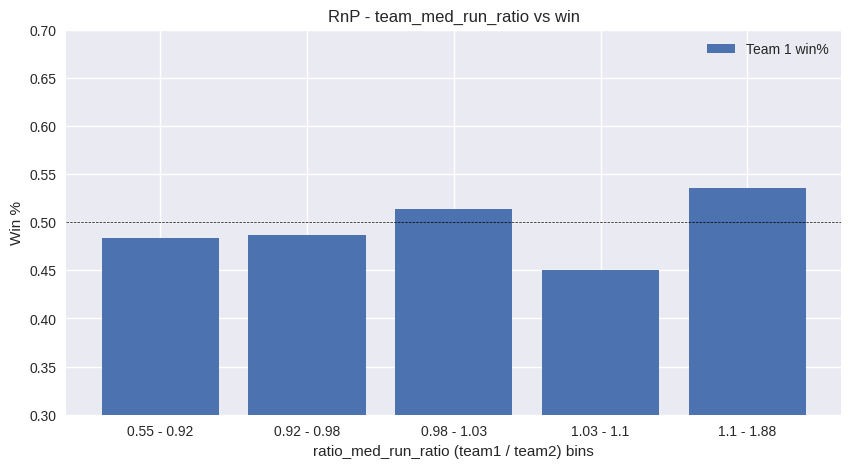

In [ ]:
createRnP(train_data, 'team_med_run_ratio')

feature bulding


In [ ]:
def giveLastNgamesPlayer(player_id, date, n, bat_or_bowl):
    '''
    Function to get last n games stats of a player before an input date.

    Input-
    1. player_id: id of the player to get historical data.
    2. date: date to look-back and get n games. Stats returned are before this input date.
    3. n: Number of historical games stats to return.
    4. bat_or_bowl: Kind of stats to return. {'bat': batting stats to return, 'bowl': bowling stats to return}

    Output-None

    Returns- dataframe having bowling/batting stats from last n games of a player before an input date.
    The results are sorted by date.
    '''
    if bat_or_bowl == 'bat':
        df_topick = batsman_data_test
        id_col = 'batsman_id'
    else:
        df_topick = bowler_data_test
        id_col = 'bowler_id'

    return df_topick[(df_topick['match_dt']<date)&(df_topick[id_col]==float(player_id))]\
                .sort_values(by='match_dt', ascending=False).head(n)

In [ ]:

def runsLastn(player_list, date, n):
    '''
    Function to get total number of 50s scored by players in the roster of a team in last n games.

    Input-
    1. player_list: ':' separated list of player ids in the roster of a team.
    2. date: match date of the game to calculate this feature.
    3. n: Number of games to look-back and create this feature.

    Output-None

    Returns- int value denoting sum of 50s scored by all players in the roster.
    '''

    player_list = str(player_list).split(':') # split string of ':' separated ids into a list of ids
    res_list = []
    for player in player_list: # loop over each player_id in roster
        df_rel = giveLastNgamesPlayer(player_id=player, date=date, n=n, bat_or_bowl='bat') # getting batting stats from last n games for each player.
        df_rel['runs_score'] = np.where(df_rel['strike_rate']>=0, df_rel['strike_rate'], 0) # binary indicator to denote whether the player scored a 50 in the game (runs>=50).
        res_list.append(np.nansum(df_rel['runs_score']))# Sum up number of 50s for the player and append to a list. We will do this for all players.
    return np.median(res_list)*1.20 # Sum up values of the list which is sum of 50s by all players in the roster.



In [ ]:
# # Compute team1's win% in last 5 games
# train_data['team1_run_bats_last15'] = train_data.progress_apply(lambda x: \
#                                   runsLastn(player_list=x['team1_roster_ids'], date=x['match_dt'], n=15), axis=1)
# # Compute team2's win% in last 5 games
# train_data['team2_run_bats_last15'] = train_data.progress_apply(lambda x: \
#                                   runsLastn(player_list=x['team2_roster_ids'], date=x['match_dt'], n=15), axis=1)
# # Compute team1's win% in last 5 games
# test_data['team1_run_bats_last15'] = test_data.progress_apply(lambda x: \
#                                   runsLastn(player_list=x['team1_roster_ids'], date=x['match_dt'], n=15), axis=1)
# # Compute team2's win% in last 5 games
# test_data['team2_run_bats_last15'] = test_data.progress_apply(lambda x: \
#                                   runsLastn(player_list=x['team2_roster_ids'], date=x['match_dt'], n=15), axis=1)
match_data_test['team1_run_bats_last15'] = match_data_test.progress_apply(lambda x: \
                                  runsLastn(player_list=x['team1_roster_ids'], date=x['match_dt'], n=15), axis=1)
# Compute team2's win% in last 5 games
match_data_test['team2_run_bats_last15'] = match_data_test.progress_apply(lambda x: \
                                  runsLastn(player_list=x['team2_roster_ids'], date=x['match_dt'], n=15), axis=1)

100%|██████████| 1945/1945 [01:01<00:00, 31.60it/s]


In [ ]:
# train_data['team_run_bat'] = (train_data['team1_run_bats_last15'] +1)/ (train_data['team2_run_bats_last15']+1)
# test_data['team_run_bat'] = (test_data['team1_run_bats_last15'] +1)/ (test_data['team2_run_bats_last15']+1)
match_data_test['team_run_bat'] = (match_data_test['team1_run_bats_last15'] +1)/ (match_data_test['team2_run_bats_last15']+1)


In [ ]:
# train_data.drop(columns=['team1_run_bats_last15','team2_run_bats_last15'], inplace=True)
# test_data.drop(columns=['team1_run_bats_last15','team2_run_bats_last15'], inplace=True)
match_data_test.drop(columns=['team1_run_bats_last15','team2_run_bats_last15'], inplace=True)

In [ ]:
def economyRunLastn(player_list, date, n):
    '''
    Function to get total number of 50s scored by players in the roster of a team in last n games.

    Input-
    1. player_list: ':' separated list of player ids in the roster of a team.
    2. date: match date of the game to calculate this feature.
    3. n: Number of games to look-back and create this feature.

    Output-None

    Returns- int value denoting sum of 50s scored by all players in the roster.
    '''

    player_list = str(player_list).split(':') # split string of ':' separated ids into a list of ids
    res_list = []
    for player in player_list: # loop over each player_id in roster
        df_rel = giveLastNgamesPlayer(player_id=player, date=date, n=n, bat_or_bowl='bowl') # getting batting stats from last n games for each player.
        df_rel['bowl_run'] = np.where(df_rel['balls_bowled']>=1, df_rel['runs']/df_rel['balls_bowled'], 1) # binary indicator to denote whether the player scored a 50 in the game (runs>=50).
        res_list.append(np.nansum(df_rel['bowl_run']))# Sum up number of 50s for the player and append to a list. We will do this for all players.
    return np.nansum(res_list)# Sum up values of the list which is sum of 50s by all players in the roster.


In [ ]:
# # Compute team1's win% in last 5 games
# train_data['team1_bowler_run_last15'] = train_data.progress_apply(lambda x: \
#                                   economyRunLastn(player_list=x['team1_roster_ids'], date=x['match_dt'], n=15), axis=1)
# # Compute team2's win% in last 5 games
# train_data['team2_bowler_run_last15'] = train_data.progress_apply(lambda x: \
#                                   economyRunLastn(player_list=x['team2_roster_ids'], date=x['match_dt'], n=15), axis=1)
# # Compute team1's win% in last 5 games
# test_data['team1_bowler_run_last15'] = test_data.progress_apply(lambda x: \
#                                   economyRunLastn(player_list=x['team1_roster_ids'], date=x['match_dt'], n=15), axis=1)
# # Compute team2's win% in last 5 games
# test_data['team2_bowler_run_last15'] = test_data.progress_apply(lambda x: \
#                                   economyRunLastn(player_list=x['team2_roster_ids'], date=x['match_dt'], n=15), axis=1)

# Compute team1's win% in last 5 games
match_data_test['team1_bowler_run_last15'] = match_data_test.progress_apply(lambda x: \
                                  economyRunLastn(player_list=x['team1_roster_ids'], date=x['match_dt'], n=15), axis=1)
# Compute team2's win% in last 5 games
match_data_test['team2_bowler_run_last15'] = match_data_test.progress_apply(lambda x: \
                                  economyRunLastn(player_list=x['team2_roster_ids'], date=x['match_dt'], n=15), axis=1)

100%|██████████| 1945/1945 [01:19<00:00, 24.38it/s]


In [ ]:
# train_data['econ_run_ratio'] = (train_data['team1_bowler_run_last15']+1)/(train_data['team2_bowler_run_last15']+1)
# test_data['econ_run_ratio'] = (test_data['team1_bowler_run_last15']+1)/(test_data['team2_bowler_run_last15']+1)
match_data_test['econ_run_ratio'] = (match_data_test['team1_bowler_run_last15']+1)/(match_data_test['team2_bowler_run_last15']+1)


In [ ]:
# train_data.drop(columns=['team1_bowler_run_last15','team2_bowler_run_last15'], inplace=True)
# test_data.drop(columns=['team1_bowler_run_last15','team2_bowler_run_last15'], inplace=True)
match_data_test.drop(columns=['team1_bowler_run_last15','team2_bowler_run_last15'], inplace=True)

In [ ]:

def no50sLastn(player_list, date, n):
    '''
    Function to get total number of 50s scored by players in the roster of a team in last n games.

    Input-
    1. player_list: ':' separated list of player ids in the roster of a team.
    2. date: match date of the game to calculate this feature.
    3. n: Number of games to look-back and create this feature.

    Output-None

    Returns- int value denoting sum of 50s scored by all players in the roster.
    '''

    player_list = str(player_list).split(':') # split string of ':' separated ids into a list of ids
    res_list = []
    for player in player_list: # loop over each player_id in roster
        df_rel = giveLastNgamesPlayer(player_id=player, date=date, n=n, bat_or_bowl='bat') # getting batting stats from last n games for each player.
        df_rel['gte_50runs'] = np.where(df_rel['runs']>=50, 1, 0) # binary indicator to denote whether the player scored a 50 in the game (runs>=50).
        res_list.append(np.nansum(df_rel['gte_50runs']))# Sum up number of 50s for the player and append to a list. We will do this for all players.
    return np.nansum(res_list)# Sum up values of the list which is sum of 50s by all players in the roster.


In [ ]:

# Computing number of 50 runs in last 15 games for team1 for train dataset.
match_data_test['team1_count_50runs_last15'] = match_data_test.progress_apply(lambda x: \
            no50sLastn(player_list=x['team1_roster_ids'], date=x['match_dt'], n=15), axis=1)
match_data_test['team2_count_50runs_last15'] = match_data_test.progress_apply(lambda x: \
            no50sLastn(player_list=x['team2_roster_ids'], date=x['match_dt'], n=15), axis=1)

100%|██████████| 1945/1945 [01:02<00:00, 31.21it/s]


In [ ]:
match_data_test['team_count_50runs_last15'] = (match_data_test['team1_count_50runs_last15']+1)/(match_data_test['team2_count_50runs_last15']+1)
match_data_test.drop(columns=['team1_count_50runs_last15','team2_count_50runs_last15'], inplace=True) # dropping intermediate columns


In [ ]:
def winpLastn(team_id, date, n):
    '''
    Get a team's win % in last n games. If a team has won 3 game out of their last 5, win% is 60%.

    Input-
    1. team_id: ID of the team to get their last n games and winner information from those games.
    2. date: match date from which to get last n historical games.
    3. n: look-back window of games.

    Output- None

    Returns- Float value denoting win% of the team in last n games.
    '''
    # filter out games with either team1/2_id as input team id, match_dt being before current game's date, sort desc by date, and get top n rows (games)
    df_rel = match_data_test[(match_data_test['match_dt']<date)&\
                      ((match_data_test['team1_id']==team_id)|(match_data_test['team2_id']==team_id))]\
                        .sort_values(by='match_dt', ascending=False).head(n)
    win_count = df_rel[df_rel['winner_id']==team_id].shape[0] # count number of rows having winner as the input team
    if win_count == 0:
        return 0
    return round(win_count*100/df_rel.shape[0], 2) # return win% rounded to two decimal points


# In[21]:


# Compute team1's win% in last 5 games
match_data_test['team1_winp_last5'] = match_data_test.progress_apply(lambda x: \
                                  winpLastn(x['team1_id'], x['match_dt'], 5), axis=1)
# Compute team2's win% in last 5 games
match_data_test['team2_winp_last5'] = match_data_test.progress_apply(lambda x: \
                                  winpLastn(x['team2_id'], x['match_dt'], 5), axis=1)


# In[22]:


# Take the ratio of (team1's win% in their last 5 games)/(team2's win% in their last 5 games). Adding 1 to avoid divide by zero error
match_data_test['team_winp_last5'] = (match_data_test['team1_winp_last5']+1)/(match_data_test['team2_winp_last5']+1)
match_data_test.drop(columns=['team1_winp_last5', 'team2_winp_last5'], inplace=True) # drop intermediate columns

100%|██████████| 1945/1945 [00:05<00:00, 374.86it/s]


In [ ]:
match_data['team1_bat_inning'] = np.where( ((match_data['team1']==match_data['toss winner'])&(match_data['toss decision']=='bat'))|\
                                               ((match_data['team2']==match_data['toss winner'])&(match_data['toss decision']=='field')) , 1, 2)

def teamMedRunsLastn(team_id, date, n):
    '''
    Function to calculate a team's average runs in their last n games.

    Input-
    1. team_id: ID of the team to calculate average runs.
    2. date: match date of the current game for which the feature is calculated.
    3. n: look-back window of games for the team.

    Output- None

    Return- Float value denoting average of runs scored by team1 in their last n games.
    '''
    # filter out games with either team1/2_id as input team_id, match date less than current game's input date, sort desc by date, and top n rows (games) returned
    df_rel = match_data[(match_data['match_dt']<date)&\
                      ((match_data['team1_id']==team_id)|(match_data['team2_id']==team_id))]\
                        .sort_values(by='match_dt', ascending=False).head(n)
    # combine two dataframes - one where input team is batting first, and another one where input team is batting second.
    df_rel = pd.concat([ df_rel[df_rel['team1_bat_inning']==1][['inning1_runs']].rename(columns={'inning1_runs':'runs'}), \
                         df_rel[df_rel['team1_bat_inning']==2][['inning2_runs']].rename(columns={'inning2_runs':'runs'}) ] )
    return df_rel['runs'].median()

In [ ]:
# Compute team1's win% in last 5 games
train_data['team1only_med_runs_last15'] = train_data.progress_apply(lambda x: \
                                  teamMedRunsLastn(team_id=x['team1_id'], date=x['match_dt'], n=15), axis=1)
# Compute team2's win% in last 5 games
train_data['team2only_med_runs_last15'] = train_data.progress_apply(lambda x: \
                                  teamMedRunsLastn(team_id=x['team2_id'], date=x['match_dt'], n=15), axis=1)
# Compute team1's win% in last 5 games
test_data['team1only_med_runs_last15'] = test_data.progress_apply(lambda x: \
                                  teamMedRunsLastn(team_id=x['team1_id'], date=x['match_dt'], n=15), axis=1)
# Compute team2's win% in last 5 games
test_data['team2only_med_runs_last15'] = test_data.progress_apply(lambda x: \
                                  teamMedRunsLastn(team_id=x['team2_id'], date=x['match_dt'], n=15), axis=1)


100%|██████████| 271/271 [00:01<00:00, 194.21it/s]


In [ ]:
train_data['team_med_run_ratio'] = (train_data['team1only_med_runs_last15']+1)/(train_data['team2only_med_runs_last15']+1)
test_data['team_med_run_ratio'] = (test_data['team1only_med_runs_last15']+1)/(test_data['team2only_med_runs_last15']+1)

In [ ]:
train_data.drop(columns=['team1only_med_runs_last15','team2only_med_runs_last15'], inplace=True)
test_data.drop(columns=['team1only_med_runs_last15','team2only_med_runs_last15'], inplace=True)

In [ ]:
match_data['team1_bat_inning'] = np.where( ((match_data['team1']==match_data['toss winner'])&(match_data['toss decision']=='bat'))|\
                                               ((match_data['team2']==match_data['toss winner'])&(match_data['toss decision']=='field')) , 1, 2)

def teamWktsLastn(team_id, date, n):
    '''
    Function to calculate a team's average runs in their last n games.

    Input-
    1. team_id: ID of the team to calculate average runs.
    2. date: match date of the current game for which the feature is calculated.
    3. n: look-back window of games for the team.

    Output- None

    Return- Float value denoting average of runs scored by team1 in their last n games.
    '''
    # filter out games with either team1/2_id as input team_id, match date less than current game's input date, sort desc by date, and top n rows (games) returned
    df_rel = match_data[(match_data['match_dt']<date)&\
                      ((match_data['team1_id']==team_id)|(match_data['team2_id']==team_id))]\
                        .sort_values(by='match_dt', ascending=False).head(n)
    # combine two dataframes - one where input team is batting first, and another one where input team is batting second.
    df_rel = pd.concat([ df_rel[df_rel['team1_bat_inning']==1][['inning1_wickets']].rename(columns={'inning1_wickets':'wkts'}), \
                         df_rel[df_rel['team1_bat_inning']==2][['inning2_wickets']].rename(columns={'inning2_wickets':'wkts'}) ] )
    return df_rel['wkts'].mean()

In [ ]:
# Compute team1's win% in last 5 games
train_data['team1only_wkts_last15'] = train_data.progress_apply(lambda x: \
                                  teamWktsLastn(team_id=x['team1_id'], date=x['match_dt'], n=15), axis=1)
# Compute team2's win% in last 5 games
train_data['team2only_wkts_last15'] = train_data.progress_apply(lambda x: \
                                  teamWktsLastn(team_id=x['team2_id'], date=x['match_dt'], n=15), axis=1)
# Compute team1's win% in last 5 games
test_data['team1only_wkts_last15'] = test_data.progress_apply(lambda x: \
                                  teamWktsLastn(team_id=x['team1_id'], date=x['match_dt'], n=15), axis=1)
# Compute team2's win% in last 5 games
test_data['team2only_wkts_last15'] = test_data.progress_apply(lambda x: \
                                  teamWktsLastn(team_id=x['team2_id'], date=x['match_dt'], n=15), axis=1)


100%|██████████| 271/271 [00:01<00:00, 210.06it/s]


In [ ]:
train_data['team_wkt_ratio'] = (train_data['team1only_wkts_last15']+1)/(train_data['team2only_wkts_last15']+1)
test_data['team_wkt_ratio'] = (test_data['team1only_wkts_last15']+1)/(test_data['team2only_wkts_last15']+1)

In [ ]:
train_data.drop(columns=['team1only_wkts_last15','team2only_wkts_last15'], inplace=True)
test_data.drop(columns=['team1only_wkts_last15','team2only_wkts_last15'], inplace=True)

In [ ]:
def wicketLastn(player_list, date, n):
    '''
    Function to get total number of 50s scored by players in the roster of a team in last n games.

    Input-
    1. player_list: ':' separated list of player ids in the roster of a team.
    2. date: match date of the game to calculate this feature.
    3. n: Number of games to look-back and create this feature.

    Output-None

    Returns- int value denoting sum of 50s scored by all players in the roster.
    '''

    player_list = str(player_list).split(':') # split string of ':' separated ids into a list of ids
    res_list = []
    for player in player_list: # loop over each player_id in roster
        df_rel = giveLastNgamesPlayer(player_id=player, date=date, n=n, bat_or_bowl='bowl') # getting batting stats from last n games for each player.
        df_rel['team_wkt_taken_lastn'] = np.where(df_rel['wicket_count']>0, df_rel['wicket_count'], 1) # binary indicator to denote whether the player scored a 50 in the game (runs>=50).
        res_list.append(np.nansum(df_rel['team_wkt_taken_lastn']))# Sum up number of 50s for the player and append to a list. We will do this for all players.
    return np.nansum(res_list)# Sum up values of the list which is sum of 50s by all players in the roster.

In [ ]:
# Compute team1's win% in last 5 games
train_data['team1_wickets_last5'] = train_data.progress_apply(lambda x: \
                                  wicketLastn(player_list=x['team1_roster_ids'], date=x['match_dt'], n=5), axis=1)
# Compute team2's win% in last 5 games
train_data['team2_wickets_last5'] = train_data.progress_apply(lambda x: \
                                  wicketLastn(player_list=x['team2_roster_ids'], date=x['match_dt'], n=5), axis=1)
# Compute team1's win% in last 5 games
test_data['team1_wickets_last5'] = test_data.progress_apply(lambda x: \
                                  wicketLastn(player_list=x['team1_roster_ids'], date=x['match_dt'], n=5), axis=1)
# Compute team2's win% in last 5 games
test_data['team2_wickets_last5'] = test_data.progress_apply(lambda x: \
                                  wicketLastn(player_list=x['team2_roster_ids'], date=x['match_dt'], n=5), axis=1)

100%|██████████| 271/271 [00:12<00:00, 22.34it/s]


In [ ]:
train_data['team_wickets_ratio_01'] = (train_data['team1_wickets_last5']+1)/(train_data['team2_wickets_last5']+1)
test_data['team_wickets_ratio_01'] = (test_data['team1_wickets_last5']+1)/(test_data['team2_wickets_last5']+1)

In [ ]:
train_data.drop(columns=['team1_wickets_last5','team2_wickets_last5'], inplace=True)
test_data.drop(columns=['team1_wickets_last5','team2_wickets_last5'], inplace=True)

In [ ]:
def groundWinpLastn(team_id, date,ground_id, n):
    '''
    Get a team's win % in last n games. If a team has won 3 game out of their last 5, win% is 60%.

    Input-
    1. team_id: ID of the team to get their last n games and winner information from those games.
    2. date: match date from which to get last n historical games.
    3. n: look-back window of games.

    Output- None

    Returns- Float value denoting win% of the team in last n games.
    '''
    # filter out games with either team1/2_id as input team id, match_dt being before current game's date, sort desc by date, and get top n rows (games)
    df_rel = match_data_test[((match_data_test['match_dt']<date)&(match_data_test['ground_id']<ground_id))&\
                      ((match_data_test['team1_id']==team_id)|(match_data_test['team2_id']==team_id))]\
                        .sort_values(by='match_dt', ascending=False).head(n)
    win_count = df_rel[df_rel['winner_id']==team_id].shape[0] # count number of rows having winner as the input team
    if win_count == 0:
        return 0
    return round(win_count*100/df_rel.shape[0], 2) # return win% rounded to two decimal points

In [ ]:
# # Compute team1's win% in last 5 games
# train_data['team1_ground_win_last10'] = train_data.progress_apply(lambda x: \
#                                   groundWinpLastn(team_id=x['team1_id'], date=x['match_dt'], ground_id=x['ground_id'], n=10), axis=1)
# # Compute team2's win% in last 5 games
# train_data['team2_ground_win_last10'] = train_data.progress_apply(lambda x: \
#                                   groundWinpLastn(team_id=x['team2_id'], date=x['match_dt'], ground_id=x['ground_id'], n=10), axis=1)
# # Compute team1's win% in last 5 games
# test_data['team1_ground_win_last10'] = test_data.progress_apply(lambda x: \
#                                   groundWinpLastn(team_id=x['team1_id'], date=x['match_dt'], ground_id=x['ground_id'], n=10), axis=1)
# # Compute team2's win% in last 5 games
# test_data['team2_ground_win_last10'] = test_data.progress_apply(lambda x: \
#                                   groundWinpLastn(team_id=x['team2_id'], date=x['match_dt'], ground_id=x['ground_id'], n=10), axis=1)
# # Compute team1's win% in last 5 games
match_data_test['team1_ground_win_last10'] = match_data_test.progress_apply(lambda x: \
                                  groundWinpLastn(team_id=x['team1_id'], date=x['match_dt'], ground_id=x['ground_id'], n=10), axis=1)
# Compute team2's win% in last 5 games
match_data_test['team2_ground_win_last10'] = match_data_test.progress_apply(lambda x: \
                                  groundWinpLastn(team_id=x['team2_id'], date=x['match_dt'], ground_id=x['ground_id'], n=10), axis=1)

100%|██████████| 1945/1945 [00:05<00:00, 352.95it/s]


In [ ]:
# train_data['ground_winp_ratio_01'] = (train_data['team1_ground_win_last10']+1)/(train_data['team2_ground_win_last10']+1)
# test_data['ground_winp_ratio_01'] =  (test_data['team1_ground_win_last10']+1)/(test_data['team2_ground_win_last10']+1)
match_data_test['ground_winp_ratio_01'] =  (match_data_test['team1_ground_win_last10']+1)/(match_data_test['team2_ground_win_last10']+1)

In [ ]:
# train_data.drop(columns=['team1_ground_win_last10','team2_ground_win_last10'], inplace=True)
# test_data.drop(columns=['team1_ground_win_last10','team2_ground_win_last10'], inplace=True)
match_data_test.drop(columns=['team1_ground_win_last10','team2_ground_win_last10'], inplace=True)

In [ ]:
def boundaryLastn(player_list, date, n):
    '''
    Function to get total number of 50s scored by players in the roster of a team in last n games.

    Input-
    1. player_list: ':' separated list of player ids in the roster of a team.
    2. date: match date of the game to calculate this feature.
    3. n: Number of games to look-back and create this feature.

    Output-None

    Returns- int value denoting sum of 50s scored by all players in the roster.
    '''

    player_list = str(player_list).split(':') # split string of ':' separated ids into a list of ids
    res_list = []
    for player in player_list: # loop over each player_id in roster
        df_rel = giveLastNgamesPlayer(player_id=player, date=date, n=n, bat_or_bowl='bat') # getting batting stats from last n games for each player.
        df_rel['team_wkt_taken_lastn'] = np.where(df_rel['runs']>0, (df_rel['Fours']+df_rel['Sixes']), 1) # binary indicator to denote whether the player scored a 50 in the game (runs>=50).
        res_list.append(np.nansum(df_rel['team_wkt_taken_lastn']))# Sum up number of 50s for the player and append to a list. We will do this for all players.
    return np.nansum(res_list)# Sum up values of the list which is sum of 50s by all players in the roster.

In [ ]:
# # Compute team1's win% in last 5 games
# train_data['team1_boundary_last15'] = train_data.progress_apply(lambda x: \
#                                   boundaryLastn(player_list=x['team1_roster_ids'], date=x['match_dt'], n=15), axis=1)
# # Compute team2's win% in last 5 games
# train_data['team2_boundary_last15'] = train_data.progress_apply(lambda x: \
#                                   boundaryLastn(player_list=x['team2_roster_ids'], date=x['match_dt'], n=15), axis=1)
# # Compute team1's win% in last 5 games
# test_data['team1_boundary_last15'] = test_data.progress_apply(lambda x: \
#                                   boundaryLastn(player_list=x['team1_roster_ids'], date=x['match_dt'], n=15), axis=1)
# # Compute team2's win% in last 5 games
# test_data['team2_boundary_last15'] = test_data.progress_apply(lambda x: \
#                                   boundaryLastn(player_list=x['team2_roster_ids'], date=x['match_dt'], n=15), axis=1)
# match_data_test
# Compute team1's win% in last 5 games
match_data_test['team1_boundary_last15'] = match_data_test.progress_apply(lambda x: \
                                  boundaryLastn(player_list=x['team1_roster_ids'], date=x['match_dt'], n=15), axis=1)
# Compute team2's win% in last 5 games
match_data_test['team2_boundary_last15'] = match_data_test.progress_apply(lambda x: \
                                  boundaryLastn(player_list=x['team2_roster_ids'], date=x['match_dt'], n=15), axis=1)

100%|██████████| 1945/1945 [01:05<00:00, 29.63it/s]


In [ ]:
# train_data['team_boundary_ratio'] = (train_data['team1_boundary_last15']+1)/(train_data['team2_boundary_last15']+1)
# test_data['team_boundary_ratio'] = (test_data['team1_boundary_last15']+1)/(test_data['team2_boundary_last15']+1)
match_data_test['team_boundary_ratio'] = (match_data_test['team1_boundary_last15']+1)/(match_data_test['team2_boundary_last15']+1)

In [ ]:
# train_data.drop(columns=['team1_boundary_last15','team2_boundary_last15'], inplace=True)
# test_data.drop(columns=['team1_boundary_last15','team2_boundary_last15'], inplace=True)
match_data_test.drop(columns=['team1_boundary_last15','team2_boundary_last15'], inplace=True)

In [ ]:
match_data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1945 entries, 0 to 1944
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   match id                  1945 non-null   int64  
 1   team1                     1945 non-null   object 
 2   team2                     1945 non-null   object 
 3   winner                    1945 non-null   object 
 4   by                        1945 non-null   object 
 5   win amount                1945 non-null   float64
 6   toss winner               1945 non-null   object 
 7   toss decision             1945 non-null   object 
 8   venue                     1945 non-null   object 
 9   city                      1767 non-null   object 
 10  match_dt                  1945 non-null   object 
 11  lighting                  1945 non-null   object 
 12  series_name               1945 non-null   object 
 13  season                    1945 non-null   object 
 14  ground_i

In [ ]:

train_data['toss_winner_01'] = np.where(train_data['toss winner']==train_data['team2'], 1, 0)
test_data['toss_winner_01'] = np.where(test_data['toss winner']==test_data['team2'], 1, 0)

In [ ]:
train_data.sample(5)

,match id,team1,team1_id,team1_roster_ids,team2,team2_id,team2_roster_ids,winner,winner_id,toss winner,toss decision,venue,city,match_dt,lighting,series_name,season,ground_id,team_count_50runs_last15,team_winp_last5,team1only_avg_runs_last15,team1_winp_team2_last15,ground_avg_runs_last15,winner_01,team_run_bat,econ_run_ratio,team_med_run_ratio,team_wickets_ratio_01,ground_winp_ratio_01,toss_winner_01,team_boundary_ratio,team_wkt_ratio
335,9516709,Rl Cs Be,30393,1776627.0:313809.0:7861524.0:2275195.0:5972868...,Mi Is,30435,5043310.0:238727.0:3125562.0:8058924.0:6249256...,Mi Is,30435,Mi Is,field,We Sm Mi,Mumbai,2023-05-09,night match,In Pr Le,2023,5004,1.500000,1.000000,180.533333,100.00,169.300000,1,2.218471,0.928945,1.035503,0.868421,1.000000,1,1.352174,0.954955
580,9272556,Ae Ss,33914,4239038.0:5492318.0:2286472.0:3681957.0:387778...,Ht Hs,33928,5843200.0:4223883.0:1611364.0:2161599.0:624925...,Ht Hs,33928,Ae Ss,bat,Be Ol Ht,Hobart,2023-01-02,night match,Bg Bh Le,2022/23,6348,1.875000,1.952381,164.333333,66.67,152.166667,1,0.629092,0.973286,0.922652,0.940000,1.243902,0,0.666667,1.037383
62,9457454,Da Ds,40452,2308928.0:4980926.0:3056752.0:1884672.0:210433...,Cm Cs,40424,7864009.0:3849642.0:6551978.0:5736100.0:282095...,Cm Cs,40424,Da Ds,bat,Zr Ad Cy Sm Cm,Chattogram,2023-01-14,night match,Bh Pr Le,2022/23,13530,0.666667,1.000000,152.500000,0.00,157.000000,1,1.000000,1.331352,0.996795,1.458333,0.009901,0,0.827586,1.010526
448,9076864,Cm Cs,40424,3761246.0:6282856.0:6551978.0:2614779.0:440345...,Ka Ts,42573,363047.0:3056752.0:2104332.0:392216.0:1881193....,Ka Ts,42573,Ka Ts,field,Zr Ad Cy Sm Cm,Chattogram,2022-01-28,day match,Bh Pr Le,2021/22,13530,0.777778,0.504950,143.000000,0.00,NaN,1,0.537757,1.314855,0.782609,1.064516,1.000000,1,1.317073,1.285714
20,9457468,Cm Cs,40424,7864009.0:4502392.0:6551978.0:2804122.0:573610...,Ca Vs,40298,3758565.0:2263736.0:1965151.0:2331475.0:577180...,Ca Vs,40298,Cm Cs,bat,Zr Ad Cy Sm Cm,Chattogram,2023-01-16,night match,Bh Pr Le,2022/23,13530,0.615385,1.487805,163.384615,0.00,157.166667,1,0.270975,0.745901,1.009524,1.000000,101.000000,0,0.453416,1.060291


## Data Modeling

In [ ]:
X_v1, y_v1 =  match_data_test[['team_run_bat', 'econ_run_ratio','team_boundary_ratio','team_count_50runs_last15','ground_winp_ratio_01'
                         ,'team_winp_last5']], match_data_test['winner_01']
# X_v1_test = test_data[X_v1.columns.tolist()]


In [ ]:
# prompt: show the varience of each feture in
X_v1.var()


team_run_bat                12965.967603
econ_run_ratio                 26.744786
team_boundary_ratio            88.792901
team_count_50runs_last15        2.380172
ground_winp_ratio_01          467.606486
team_winp_last5               342.473216
dtype: float64

In [ ]:
# prompt: fill nA values of X_v1 and X_v1_test with mean valuesof the column

# Calculate the mean of each column in X_v1
column_med = X_v1.median(axis=0)

# Replace NaN values in X_v1 with the corresponding column means
X_v1.fillna(0,inplace=True)


# Repeat the same process for X_v1_test
# column_med_test = X_v1_test.median(axis=0)
# X_v1_test.fillna(0,inplace=True)


<ipython-input-28-35d330459cdc>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_v1.fillna(0,inplace=True)


In [ ]:
# prompt: turn varience of each feture between 0 to 1

from sklearn.preprocessing import StandardScaler

# Create a standard scaler object
scaler = StandardScaler()

# Fit the scaler to the training data
scaler.fit(X_v1)

# Transform the training and test data
X_v1_scaled = scaler.transform(X_v1)
X_v1_test_scaled = scaler.transform(X_v1_test)

# Print the transformed data
print(X_v1_scaled)
print(X_v1_test_scaled)


StandardScaler()

[[-0.13828613  0.04387658  0.18874468 -0.24914235 -0.58699594 -0.10254121]
 [-0.13800094 -0.12100081 -0.11041432  3.16813406 -0.43927607 -0.26061388]
 [-0.13986976 -0.10858699 -0.11735805 -0.27445423 -0.46361886 -0.14841914]
 ...
 [ 0.81047726 -0.19466587 -0.12657184 -0.27445423 -0.10972783  0.1343387 ]
 [-0.14335165 -0.13592996 -0.11576099 -0.26186003  0.05438226 -0.28075808]
 [ 0.01450877 -0.06146703 -0.09158992 -0.18508381 -0.24895089  1.16799651]]
[[-1.46127148e-01 -2.51204367e-01 -3.81432945e-01 -2.74454233e-01
  -1.69596845e-01 -3.96846563e-01]
 [-1.40276718e-01 -1.19709266e-01 -1.61562326e-01 -2.74454233e-01
  -3.51816345e-01 -1.70733917e-01]
 [-1.39496911e-01 -8.96267401e-02 -1.35420012e-01  2.30735789e+00
  -7.53929475e-01 -6.37790460e-02]
 ...
 [-1.34844149e-01 -6.66690364e-02 -8.03091877e-02 -2.00688172e-01
   2.72157203e-03  3.46021879e-04]
 [-1.39049386e-01 -8.70573234e-04 -1.10555766e-01 -2.49265822e-01
   1.39058390e+00 -1.20630226e-01]
 [-1.39220237e-01 -5.25159862e-02 

## Model Building

In [ ]:
X,y = train_data[['team_run_bat', 'econ_run_ratio','team_med_run_ratio','ground_winp_ratio_01'
                         ]], train_data['winner_01']
X_test = test_data[X.columns.tolist()]

In [ ]:
# prompt: remove NaN values from X

X.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)


<ipython-input-47-41d734b5511f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(0, inplace=True)
<ipython-input-47-41d734b5511f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.fillna(0, inplace=True)


AttributeError: 'NoneType' object has no attribute 'info'

In [ ]:
# prompt: create XGBoost classifier

import xgboost as xgb

clf = xgb.XGBClassifier(
    n_estimators=500,
    max_depth=7,
    booster='gbtree',
    eta=0.3,
    gamma=0,
    objective='binary:logistic',
    nthread=4,
    importance_type='total_gain',
    subsample=1,
    colsample_bytree=1,
    colsample_bylevel=1,
    reg_alpha=0.001,
    reg_lambda=1,
    random_state=42,
    seed=42
)

# clf.fit(X, y)



In [ ]:
# prompt: use RE from sklearn.feature_selection to find best features

from sklearn.feature_selection import SelectKBest, RFE
selector = RFE(clf, n_features_to_select=5)
selector.fit(X, y)
X_new = selector.transform(X)
X_test_new = selector.transform(X_test)


RFE(estimator=XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
                            colsample_bylevel=1, colsample_bynode=None,
                            colsample_bytree=1, device=None,
                            early_stopping_rounds=None,
                            enable_categorical=False, eta=0.3, eval_metric=None,
                            feature_types=None, gamma=0, grow_policy=None,
                            importance_type='total_gain',
                            interaction_constraints=None, learning_rate=None,
                            max_bin=None, max_cat_threshold=None,
                            max_cat_to_onehot=None, max_delta_step=None,
                            max_depth=7, max_leaves=None, min_child_weight=None,
                            missing=nan, monotone_constraints=None,
                            multi_strategy=None, n_estimators=1000, n_jobs=None,
                            nthread=4, ...),
    n_features_to_select=5)

In [ ]:
# prompt: train test split and use clf model to check score

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
y_pred = clf.predict(X_test)
print(accuracy_score(y_pred,y_test))
print(score)


XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=None, colsample_bytree=1,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eta=0.3, eval_metric=None, feature_types=None, gamma=0,
              grow_policy=None, importance_type='total_gain',
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None, nthread=4, ...)

0.5052631578947369
0.5052631578947369


In [ ]:
# prompt: use KfoldCrossValidation

from sklearn.model_selection import KFold
kf = KFold(n_splits=20, shuffle=True)
kf.get_n_splits(X)
scores = []
for train_index, test_index in kf.split(X):
    # print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    scores.append(score)
    # print(score)
# clf.fit(X_v1_train, y_v1_train)
# y_pred = clf.predict(X_v1)


20

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=None, colsample_bytree=1,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eta=0.3, eval_metric=None, feature_types=None, gamma=0,
              grow_policy=None, importance_type='total_gain',
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None, nthread=4, ...)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=None, colsample_bytree=1,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eta=0.3, eval_metric=None, feature_types=None, gamma=0,
              grow_policy=None, importance_type='total_gain',
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None, nthread=4, ...)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=None, colsample_bytree=1,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eta=0.3, eval_metric=None, feature_types=None, gamma=0,
              grow_policy=None, importance_type='total_gain',
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None, nthread=4, ...)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=None, colsample_bytree=1,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eta=0.3, eval_metric=None, feature_types=None, gamma=0,
              grow_policy=None, importance_type='total_gain',
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None, nthread=4, ...)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=None, colsample_bytree=1,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eta=0.3, eval_metric=None, feature_types=None, gamma=0,
              grow_policy=None, importance_type='total_gain',
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None, nthread=4, ...)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=None, colsample_bytree=1,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eta=0.3, eval_metric=None, feature_types=None, gamma=0,
              grow_policy=None, importance_type='total_gain',
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None, nthread=4, ...)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=None, colsample_bytree=1,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eta=0.3, eval_metric=None, feature_types=None, gamma=0,
              grow_policy=None, importance_type='total_gain',
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None, nthread=4, ...)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=None, colsample_bytree=1,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eta=0.3, eval_metric=None, feature_types=None, gamma=0,
              grow_policy=None, importance_type='total_gain',
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None, nthread=4, ...)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=None, colsample_bytree=1,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eta=0.3, eval_metric=None, feature_types=None, gamma=0,
              grow_policy=None, importance_type='total_gain',
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None, nthread=4, ...)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=None, colsample_bytree=1,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eta=0.3, eval_metric=None, feature_types=None, gamma=0,
              grow_policy=None, importance_type='total_gain',
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None, nthread=4, ...)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=None, colsample_bytree=1,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eta=0.3, eval_metric=None, feature_types=None, gamma=0,
              grow_policy=None, importance_type='total_gain',
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None, nthread=4, ...)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=None, colsample_bytree=1,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eta=0.3, eval_metric=None, feature_types=None, gamma=0,
              grow_policy=None, importance_type='total_gain',
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None, nthread=4, ...)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=None, colsample_bytree=1,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eta=0.3, eval_metric=None, feature_types=None, gamma=0,
              grow_policy=None, importance_type='total_gain',
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None, nthread=4, ...)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=None, colsample_bytree=1,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eta=0.3, eval_metric=None, feature_types=None, gamma=0,
              grow_policy=None, importance_type='total_gain',
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None, nthread=4, ...)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=None, colsample_bytree=1,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eta=0.3, eval_metric=None, feature_types=None, gamma=0,
              grow_policy=None, importance_type='total_gain',
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None, nthread=4, ...)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=None, colsample_bytree=1,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eta=0.3, eval_metric=None, feature_types=None, gamma=0,
              grow_policy=None, importance_type='total_gain',
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None, nthread=4, ...)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=None, colsample_bytree=1,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eta=0.3, eval_metric=None, feature_types=None, gamma=0,
              grow_policy=None, importance_type='total_gain',
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None, nthread=4, ...)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=None, colsample_bytree=1,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eta=0.3, eval_metric=None, feature_types=None, gamma=0,
              grow_policy=None, importance_type='total_gain',
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None, nthread=4, ...)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=None, colsample_bytree=1,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eta=0.3, eval_metric=None, feature_types=None, gamma=0,
              grow_policy=None, importance_type='total_gain',
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None, nthread=4, ...)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=None, colsample_bytree=1,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eta=0.3, eval_metric=None, feature_types=None, gamma=0,
              grow_policy=None, importance_type='total_gain',
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None, nthread=4, ...)

In [ ]:
np.mean(scores)

0.5189716312056738

In [ ]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest,RFE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
kf = KFold(n_splits=10, shuffle=True)

from sklearn.metrics import f1_score
score_list = []

for k in range(1,8):
  score_for_k=[]
  selector = RFE(clf, n_features_to_select=k)
  selector.fit(X, y)
  X_new = selector.transform(X)
  y_new = y
  kf.get_n_splits(X_new)
  for train_index, test_index in kf.split(X_new):
    # print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X_new[train_index], X_new[test_index]
    y_train, y_test = y_new.iloc[train_index], y_new.iloc[test_index]
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    score_for_k.append(score)
  score_list.append(np.mean(score_for_k))
    # print(score)
# clf.fit(X_v1_train, y_v1_train)
# y_pred = clf.predict(X_v1)


NameError: name 'clf' is not defined

In [ ]:
f1_score_list

[0.5819070904645477,
 0.5819070904645477,
 0.5819070904645477,
 0.5819070904645477,
 0.5819070904645477,
 0.5819070904645477,
 0.5819070904645477,
 0.5819070904645477,
 0.5819070904645477,
 0.5819070904645477]

In [ ]:
selector = SelectKBest(mutual_info_classif, k=8)
selector.fit(X_v1_train, y_v1_train)
selected_feature_mask = selector.get_support()
selected_feature_names = X_v1_train.columns[selected_feature_mask]
selected_feature_names

SelectKBest(k=8, score_func=<function mutual_info_classif at 0x78bc683e4af0>)

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [ ]:
clf.fit(X, y)


In [ ]:
# prompt: use xgboost with parameters  parameters: {'n_estimators': 214, 'learning_rate': 0.029377936775185798, 'max_depth': 57, 'min_child_weight': 1, 'subsample': 0.5900373724052937, 'colsample_bytree': 0.8853711816687976, 'gamma': 4.693594243891163, 'reg_alpha': 0.28135543999428364, 'reg_lambda': 0.047106162621526775}
import xgboost
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
x_train,x_test,y_train,y_test= train_test_split(X, y,random_state=42)

model = XGBClassifier(n_estimators=214,
                     learning_rate=0.029377936775185798,
                     max_depth=57,
                     min_child_weight=1,
                     subsample=0.5900373724052937,
                     colsample_bytree=0.8853711816687976,
                     gamma=4.693594243891163,
                     reg_alpha=0.28135543999428364,
                     reg_lambda=0.047106162621526775)
model.fit(x_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8853711816687976, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=4.693594243891163,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.029377936775185798,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=57, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=214, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
import xgboost
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Check for duplicate column names in X
duplicate_columns = X.columns[X.columns.duplicated()]
print("Duplicate columns:", duplicate_columns)

# Handle duplicate column names (example: rename)
X = X.loc[:, ~X.columns.duplicated()]  # Keep only the first occurrence of duplicate columns

x_train,x_test,y_train,y_test= train_test_split(X, y,random_state=42)

model = XGBClassifier(n_estimators=214,
                     learning_rate=0.029377936775185798,
                     max_depth=57,
                     min_child_weight=1,
                     subsample=0.5900373724052937,
                     colsample_bytree=0.8853711816687976,
                     gamma=4.693594243891163,
                     reg_alpha=0.28135543999428364,
                     reg_lambda=0.047106162621526775)
model.fit(x_train, y_train)

Duplicate columns: Index([], dtype='object')


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8853711816687976, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=4.693594243891163,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.029377936775185798,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=57, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=214, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred = model.predict(x_test)
print("Prediction accuracy:", accuracy_score(y_test, y_pred))

Prediction accuracy: 0.5485232067510548


In [ ]:
# prompt: print predict accracy

y_pred = model2.predict(x_test_01)
print("Prediction accuracy:", accuracy_score(y_test_01, y_pred))


Prediction accuracy: 0.6033755274261603


In [ ]:
import xgboost
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Check for duplicate column names in X
# duplicate_columns = X_v1.columns[X_v1.columns.duplicated()]
# print("Duplicate columns:", duplicate_columns)

# Handle duplicate column names (example: rename)
# X_v1 = X_v1[:, ~X_v1.values.duplicated()]  # Keep only the first occurrence of duplicate columns

x_train_01,x_test_01,y_train_01,y_test_01= train_test_split(X_v1, y_v1,random_state=42)

model2 = XGBClassifier(n_estimators=214,
                     learning_rate=0.029377936775185798,
                     max_depth=57,
                     min_child_weight=1,
                     subsample=0.5900373724052937,
                     colsample_bytree=0.8853711816687976,
                     gamma=4.693594243891163,
                     reg_alpha=0.28135543999428364,
                     reg_lambda=0.047106162621526775)
model2.fit(x_train_01, y_train_01)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8853711816687976, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=4.693594243891163,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.029377936775185798,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=57, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=214, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
# prompt: create a lightgbm model

import lightgbm as lgb

# Create a LightGBM model
model3 = lgb.LGBMClassifier(
    n_estimators=200,
    learning_rate=0.027,
    num_leaves=5,
    max_depth=7,
    min_child_samples=20,
    subsample=0.5,
    colsample_bytree=0.8,
    reg_alpha=0.1,
    reg_lambda=0.1,
    random_state=42,
    min_gain_to_split = 0.001
)

# Fit the model to the training data
model3.fit(x_train_01, y_train_01)

# Predict the labels for the test data
y_pred = model3.predict(x_test_01)

# Evaluate the model performance
accuracy = accuracy_score(y_test_01, y_pred)
print("Accuracy:", accuracy)


[LightGBM] [Warning] min_gain_to_split is set=0.001, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.001
[LightGBM] [Warning] min_gain_to_split is set=0.001, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.001
[LightGBM] [Info] Number of positive: 367, number of negative: 344
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000103 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 971
[LightGBM] [Info] Number of data points in the train set: 711, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.516174 -> initscore=0.064720
[LightGBM] [Info] Start training from score 0.064720


LGBMClassifier(colsample_bytree=0.8, learning_rate=0.027, max_depth=7,
               min_gain_to_split=0.001, n_estimators=200, num_leaves=5,
               random_state=42, reg_alpha=0.1, reg_lambda=0.1, subsample=0.5)

[LightGBM] [Warning] min_gain_to_split is set=0.001, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.001
Accuracy: 0.5991561181434599


In [ ]:
# prompt: generate a sklearn gradient boost model

from sklearn.ensemble import GradientBoostingClassifier

# Create a GradientBoostingClassifier object
model4 = GradientBoostingClassifier(
    n_estimators=500,  # Number of decision trees
    learning_rate=0.01,  # Learning rate
    max_depth=7,  # Maximum depth of each tree
    subsample=0.5,  # Subsample ratio
    random_state=42  # Random seed
)

# Fit the model to the training data
model4.fit(X_v1,y_v1)

# Predict the labels for the test data
# y_pred = model4.predict(x_test_01)

# # Evaluate the model performance
# accuracy = accuracy_score(y_test_01, y_pred)
# print("Accuracy:", accuracy)


GradientBoostingClassifier(learning_rate=0.01, max_depth=7, n_estimators=500,
                           random_state=42, subsample=0.5)

In [ ]:
# prompt: ensemble model2 and model3

from sklearn.ensemble import VotingClassifier

# Create a voting classifier
voting_model = VotingClassifier(estimators=[('model2', model2), ('model4', model4)], voting='hard')

# Fit the voting classifier to the training data
voting_model.fit(x_train_01, y_train_01)

# Predict the labels for the test data
# y_pred_ensemble = voting_model.predict(X_v1_test)

# # Evaluate the model performance
# accuracy = accuracy_score(y_test_01, y_pred_ensemble)
# print("Ensemble accuracy:", accuracy)


VotingClassifier(estimators=[('model2',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=0.8853711816687976,
                                            device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None,
                                            gamma=4.693594243891163,
                                            grow_policy=None,
                                            importance_type=None,
                                            interactio...
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=57,
                                            max_leaves=None, min_child_weight=1,
                                            missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=214, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...)),
                             ('model4',
                              GradientBoostingClassifier(learning_rate=0.01,
                                                         max_depth=7,
                                                         n_estimators=500,
                                                         random_state=42,
                                                         subsample=0.5))])

In [ ]:
# prompt: cross validation score of y_pred_02

from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=20)

print("Cross-validation scores:", scores)

print("Average cross-validation score:", scores.mean())


Cross-validation scores: [0.47916667 0.58333333 0.64583333 0.5625     0.5        0.625
 0.64583333 0.66666667 0.61702128 0.46808511 0.57446809 0.57446809
 0.55319149 0.53191489 0.57446809 0.57446809 0.55319149 0.55319149
 0.46808511 0.63829787]
Average cross-validation score: 0.5694592198581561


In [ ]:
# prompt: cross validation score of y_pred_02

from sklearn.model_selection import cross_val_score

scores = cross_val_score(model4, X_v1, y_v1, cv=20)

print("Cross-validation scores:", scores)

print("Average cross-validation score:", scores.mean())


Cross-validation scores: [0.625      0.52083333 0.625      0.58333333 0.52083333 0.54166667
 0.625      0.52083333 0.46808511 0.38297872 0.68085106 0.53191489
 0.68085106 0.55319149 0.68085106 0.57446809 0.59574468 0.40425532
 0.57446809 0.68085106]
Average cross-validation score: 0.5685505319148937


In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(voting_model, X_v1, y_v1, cv=20)

print("Cross-validation scores:", scores)

print("Average cross-validation score:", scores.mean())

Cross-validation scores: [0.6875     0.52083333 0.54166667 0.58333333 0.5        0.52083333
 0.66666667 0.54166667 0.4893617  0.40425532 0.72340426 0.55319149
 0.63829787 0.57446809 0.57446809 0.55319149 0.61702128 0.40425532
 0.57446809 0.63829787]
Average cross-validation score: 0.5653590425531915


In [ ]:
!pip install --upgrade shap

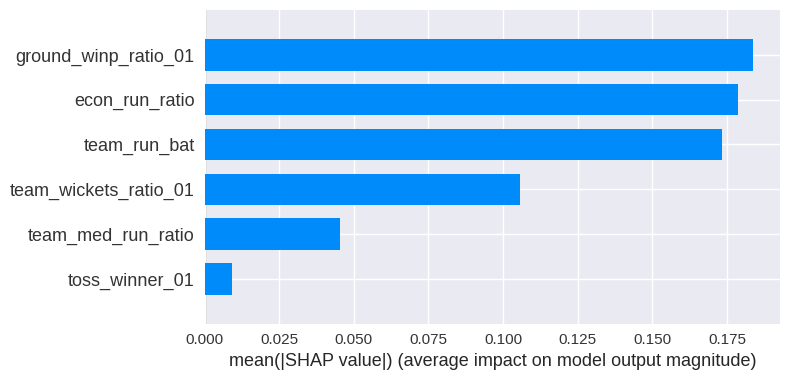

In [ ]:
# prompt: show shap value and barplot

import shap

# Load the explainer
explainer = shap.Explainer(model.predict, X)

# Calculate Shap values for the test set
shap_values = explainer(X_test)

# Get the top 10 features with the highest mean absolute Shap value
# shap.summary_plot(shap_values, x_test)

# Create a bar plot of the top 10 features
shap.summary_plot(shap_values, X_test, feature_names=X.columns, plot_type="bar")


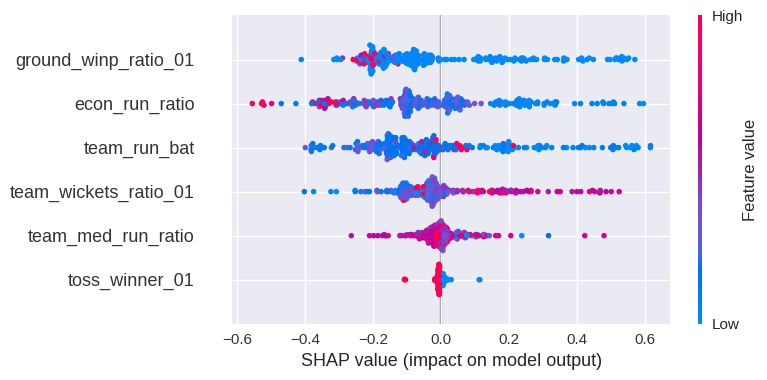

In [ ]:
shap.summary_plot(shap_values, X_test)


In [ ]:
!pip install boruta

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 1.9 MB/s eta 0:00:00


In [ ]:
x_train_02,x_test_02,y_train_02,y_test_02= train_test_split(X_v1, y,random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy
import numpy as np # Import numpy

# Define the BorutaPy object with the RandomForestClassifier model and the desired number of iterations
feat_selector = BorutaPy(
    model,
    n_estimators='auto',
    verbose=2
)
np.int = np.int32
np.float = np.float64
np.bool = np.bool_

# Fit the BorutaPy object to the training data
feat_selector.fit(x_train_02.values, y_train_02.values)

# Get the selected features
selected_features = X_v1.columns[feat_selector.support_]

# Get the ranking of the features
ranking = feat_selector.ranking_

# Print the selected features and their ranking
print("Selected features:", selected_features)
print("Feature ranking:", ranking)


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	0
Tentative: 	7
Rejected: 	5
Iteration: 	9 / 100
Confirmed: 	0
Tentative: 	7
Rejected: 	5
Iteration: 	10 / 100
Confirmed: 	0
Tentative: 	7
Rejected: 	5
Iteration: 	11 / 100
Confirmed: 	0
Tentative: 	7
Rejected: 	5
Iteration: 	12 / 100
Confirmed: 	0
Tentative: 	7
Rejected: 	5
Iteration: 	13 / 100
Confirmed: 	0
Tentative: 	7
Rejected: 	5
Iteration: 	14 / 100
Confirmed: 	0
Tentative: 	7
Rejected: 	5
Iteration: 	15 / 100
Confirmed: 	0
Tentative: 	7
Rejected: 	5
Iteration: 	16 / 100
Confirmed: 	1
Tentative: 	5
Rejected: 	6
Iteration:

BorutaPy(estimator=XGBClassifier(base_score=None, booster=None, callbacks=None,
                                 colsample_bylevel=None, colsample_bynode=None,
                                 colsample_bytree=0.8853711816687976,
                                 device=None, early_stopping_rounds=None,
                                 enable_categorical=False, eval_metric=None,
                                 feature_types=None, gamma=4.693594243891163,
                                 grow_policy=None, importance_type=None,
                                 interaction_constraints=None,
                                 l...185798,
                                 max_bin=None, max_cat_threshold=None,
                                 max_cat_to_onehot=None, max_delta_step=None,
                                 max_depth=57, max_leaves=None,
                                 min_child_weight=1, missing=nan,
                                 monotone_constraints=None, multi_strategy=None,
                                 n_estimators=4, n_jobs=None,
                                 num_parallel_tree=None, random_state=760515589, ...),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x7A5FFF39E240, verbose=2)

Selected features: Index(['team_boundary_ratio'], dtype='object')
Feature ranking: [ 5  4  9  1 11  7 12  2  3  5  8 10]


In [ ]:
'team_run_bat', 'econ_run_ratio','team_boundary_ratio','team_count_50runs_last15','ground_winp_ratio_01'
                         ,'team_winp_last5'

In [ ]:
 X_filtered = feat_selector.transform(x_train_02.values)

In [ ]:
feature_names = np.array(X_v1.columns)
feature_rank = list(zip(feature_names,feat_selector.ranking_,feat_selector.support_))

In [ ]:
print(X_filtered)

[]


In [ ]:
model.fit(X_filtered, y_train_02)

XGBoostError: [21:14:13] /workspace/src/data/iterative_dmatrix.cc:202: Check failed: n_features >= 1 (0 vs. 1) : Data must has at least 1 column.
Stack trace:
  [bt] (0) /usr/local/lib/python3.10/dist-packages/xgboost/lib/libxgboost.so(+0x3effba) [0x7e9e4f177fba]
  [bt] (1) /usr/local/lib/python3.10/dist-packages/xgboost/lib/libxgboost.so(+0x3f59b7) [0x7e9e4f17d9b7]
  [bt] (2) /usr/local/lib/python3.10/dist-packages/xgboost/lib/libxgboost.so(+0x3f8858) [0x7e9e4f180858]
  [bt] (3) /usr/local/lib/python3.10/dist-packages/xgboost/lib/libxgboost.so(+0x3a2a07) [0x7e9e4f12aa07]
  [bt] (4) /usr/local/lib/python3.10/dist-packages/xgboost/lib/libxgboost.so(XGQuantileDMatrixCreateFromCallback+0x2b0) [0x7e9e4eeedc40]
  [bt] (5) /lib/x86_64-linux-gnu/libffi.so.8(+0x7e2e) [0x7e9eb84b5e2e]
  [bt] (6) /lib/x86_64-linux-gnu/libffi.so.8(+0x4493) [0x7e9eb84b2493]
  [bt] (7) /usr/lib/python3.10/lib-dynload/_ctypes.cpython-310-x86_64-linux-gnu.so(+0xa3e9) [0x7e9eb84db3e9]
  [bt] (8) /usr/lib/python3.10/lib-dynload/_ctypes.cpython-310-x86_64-linux-gnu.so(+0x9a00) [0x7e9eb84daa00]



###File making


In [ ]:
match_data_test['y_pred_01'] = model4.predict(X_v1)
# test_data['y_pred_01'] = model4.predict(X_v1_test)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
match_data_test['win_pred_score'] = model4.predict_proba(X_v1)[:,1]
# test_data['win_pred_score'] = model4.predict_proba(X_v1_test)[:,1]

In [ ]:
match_data_test['win_pred_score'] = np.where( (match_data_test['y_pred_01']==0), (1-match_data_test['win_pred_score']), match_data_test['win_pred_score'])
# test_data['win_pred_score'] = np.where( (test_data['y_pred_01']==0), (1-test_data['win_pred_score']), test_data['win_pred_score'])

In [ ]:
match_data_test['win_pred_score'].mean()

0.6996967061572398

In [ ]:
df_feat_importance = pd.DataFrame({'feat_name':X_v1.columns.tolist(), 'model_feat_imp_train':model4.feature_importances_}).sort_values(by='model_feat_imp_train', ascending=False)\
                                                                                                                        .reset_index(drop=True).head(10)
df_feat_importance

,feat_name,model_feat_imp_train
0,team_boundary_ratio,0.208317
1,econ_run_ratio,0.202177
2,team_run_bat,0.201770
3,team_count_50runs_last15,0.137068
4,ground_winp_ratio_01,0.130138
5,team_winp_last5,0.120530


In [ ]:
match_data_test['win_pred_team_id'] = np.where( (match_data_test['y_pred_01']==0), (match_data_test['team1_id']), match_data_test['team2_id'])
# test_data['win_pred_team_id'] = np.where( (test_data['y_pred_01']==0), (test_data['team1_id']), test_data['team2_id'])

###File1

In [ ]:
match_data_test['dataset_type'] = 'r2'
# test_data['dataset_type'] = 'r1'

In [ ]:
GradientBoostingClassifier(
    n_estimators=500,  # Number of decision trees
    learning_rate=0.01,  # Learning rate
    max_depth=7,  # Maximum depth of each tree
    subsample=0.5,  # Subsample ratio
    random_state=42  # Random seed
)


In [ ]:
match_data_test

,match id,team1,team2,winner,by,win amount,toss winner,toss decision,venue,city,match_dt,lighting,series_name,season,ground_id,umpire1,umpire2,inning1_runs,inning1_wickets,inning1_balls,inning2_runs,inning2_wickets,inning2_balls,team1_id,team1_roster_ids,team2_id,team2_roster_ids,series_type,winner_id,player_of_the_match_id,winner_01,team_run_bat,econ_run_ratio,team_count_50runs_last15,team_winp_last5,ground_winp_ratio_01,team_boundary_ratio,y_pred_01,win_pred_score,win_pred_team_id,dataset_type
0,8638034,Nn Ds,Wn,Wn,wickets,9.0,Wn,field,By Ol,Mount Maunganui,2021-01-01,night match,Sr Sh,2020/21,17681,Dn Mw,TJ Pe,148,6,130,152.0,1.0,97.0,17982,7907451.0:4381761.0:31464.0:258649.0:4949790.0...,18570,2653993.0:6718326.0:6718382.0:2486896.0:228878...,other_domestic,18570,NaN,1,1.000000,1.000000,1.000,1.000000,1.000000,1.000000,1,0.542653,18570,r2
1,8588005,Me Rs,Sy Tr,Sy Tr,runs,7.0,Sy Tr,field,Ca Ol,Carrara,2021-01-01,night match,Bg Bh Le,2020/21,6663,D Tr,PJ Ge,166,6,106,117.0,2.0,74.0,33942,37351.0:46794.0:5406540.0:2231928.0:181404.0:1...,33963,1506098.0:1749075.0:36665.0:2083409.0:7534652....,other_domestic,33963,1749075.0,1,1.000000,1.000000,1.000,1.000000,1.000000,1.000000,1,0.542653,33963,r2
2,8587837,Sy Ss,Be Ht,Be Ht,wickets,4.0,Sy Ss,bat,Be Ct Gd,Brisbane,2021-01-02,night match,Bg Bh Le,2020/21,1476,GJ Dn,PJ Ge,165,8,126,171.0,6.0,119.0,33956,7869987.0:7620283.0:2076192.0:4002340.0:306369...,33921,7620269.0:2286437.0:87191.0:5786766.0:3114803....,other_domestic,33921,3890984.0,1,1.000000,1.000000,1.000,1.000000,1.000000,1.000000,1,0.542653,33921,r2
3,8638041,Nn Ds,Oo,Oo,wickets,2.0,Oo,field,By Ol,Mount Maunganui,2021-01-02,night match,Sr Sh,2020/21,17681,GA St,TJ Pe,153,7,128,156.0,8.0,126.0,17982,7907451.0:4381761.0:31464.0:4949790.0:258649.0...,18360,2319638.0:256080.0:7918280.0:3913447.0:2690498...,other_domestic,18360,NaN,1,109.000000,8.472222,1.000,1.000000,1.000000,9.000000,1,0.634860,18360,r2
4,8587921,Ht Hs,Me Ss,Ht Hs,runs,21.0,Me Ss,field,Be Ol,Hobart,2021-01-02,day/night match,Bg Bh Le,2020/21,6348,GA Ad,NR Je,164,5,126,143.0,9.0,123.0,33928,4223883.0:2161599.0:1655436.0:5788418.0:319948...,33949,363047.0:2275097.0:3901078.0:2275195.0:4230127...,other_domestic,33928,3125849.0,0,1.000000,1.000000,1.000,1.000000,1.000000,1.000000,1,0.542653,33949,r2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1940,10033547,Wt Is,Sh Aa,Wt Is,runs,28.0,Sh Aa,field,Sa Pk Kn Ja,Kingston,2024-05-23,day match,Sh Aa tr of Wt Is My 24,2024,1413,GO Be,JS Wn,175,8,126,147.0,10.0,122.0,41,4690258.0:2331475.0:2436405.0:2742837.0:363047...,34,2654014.0:1884973.0:4239640.0:4166882.0:236454...,international,41,4690258.0,0,2.523405,0.914662,1.625,1.952381,0.753657,1.960526,0,0.741002,41,r2
1941,9997105,Id,Ns,Id,runs,3.0,Ns,field,Sk Wt Te He,The Hague,2024-05-24,day match,Id tr of Ns,2024,17765,N Bi,Rn Am,161,6,122,158.0,5.0,121.0,216,2123974.0:2124002.0:6496412.0:6729862.0:417146...,118,7500541.0:4502392.0:8076382.0:7891232.0:725335...,international,216,2436251.0,0,4.425344,1.692776,1.000,1.487805,0.508197,1.643836,0,0.820209,216,r2
1942,9975944,Ud Ss of Aa,Bh,Bh,wickets,10.0,Bh,field,Pe Vw Ct Cx,Houston,2024-05-25,day match,Bh tr of Ud Ss of Aa,2024,25206,SN Br,Va Ma,104,9,126,108.0,0.0,72.0,90,4534410.0:3397666.0:2436916.0:3163642.0:670352...,188,6930174.0:3056752.0:3758565.0:4403419.0:393014...,international,188,2316327.0,1,0.299674,0.401782,1.000,2.463415,0.577465,0.362500,1,0.738806,188,r2
1943,10033554,Wt Is,Sh Aa,Wt Is,runs,16.0,Wt Is,bat,Sa Pk Kn Ja,Kingston,2024-05-25,day match,Sh Aa tr of Wt Is My 24,2024,1413,JS Wn,N Dd,207,7,123,191.0,7.0,132.0,41,4690258.0:2331475.0:2436405.0:2742837.0:363047...,34,1884973.0:2654014.0:4239640.0:4166882.0:236454...,international,41,2742837.0,0,2.000572,1.087263,1.750,2.904762,0.753657,2.335616,0,0.835470,41,r2


In [ ]:
## refactor
algo_name = 'GradientBoostClassifier'
is_ensemble = 'no'
n_trees = 10
depth = 7
lr = 0.01
df_file1 = pd.concat([match_data_test[['match id','dataset_type','win_pred_team_id','win_pred_score',] + list(df_feat_importance['feat_name'].head(10))]])
df_file1['train_algorithm'] = algo_name
df_file1['is_ensemble'] = is_ensemble
df_file1['train_hps_trees'] = n_trees
df_file1['train_hps_depth'] = depth
df_file1['train_hps_lr'] = lr



In [ ]:
renaming_dict = {}
for i,col in enumerate(list(df_feat_importance['feat_name'].head(10))):
    renaming_dict[col] = f'indep_feat_id{i+1}'
df_file1.rename(columns=renaming_dict, inplace=True)

for i in range(1,11):
    if f'indep_feat_id{i}' not in df_file1.columns:
        df_file1[f'indep_feat_id{i}'] = np.nan


In [ ]:
X_v1.columns

Index(['team_run_bat', 'econ_run_ratio', 'team_boundary_ratio',
       'team_count_50runs_last15', 'ground_winp_ratio_01', 'team_winp_last5'],
      dtype='object')

In [ ]:
feature_desc = { 'team_boundary_ratio':'Team1\'s boundary hit ratio against Team2 in last 15 games',\
               'team_med_run_ratio':'Team1\'s median inning runs against Team2 in last 15 games',\
                 'team_run_bat':'Team1\'s batsmen\'s avg runs on strike rate basis against Team2 in last 10 games',\
                 'econ_run_ratio':'Team1\'s bowler\'s conceeded runs against Team2 in last 10 games',\
               'team_winp_last5' : 'Team1\'s match win ratio against Team2\'s',\
                 'ground_winp_ratio_01' : 'Team1\'s Ground win ratio against Team2\'s',\
               'team_count_50runs_last15' : 'Team1\'s number of batsman scoring more than 50 runs wrt Team2\'s'}

In [ ]:
# df_feat_importance.rename(index={0:'feat_id'}, inplace=True)
df_file2 = df_feat_importance
df_file2['feat_id'] = [i+1 for i in df_file2.index]
df_file2['feat_rank_train'] = [i+1 for i in df_file2.index]
df_file2 = df_file2.set_index('feat_id')
df_file2['feat_description'] = df_file2['feat_name'].map(feature_desc)

In [ ]:
df_file1

,match id,dataset_type,win_pred_team_id,win_pred_score,indep_feat_id1,indep_feat_id2,indep_feat_id3,indep_feat_id4,indep_feat_id5,indep_feat_id6,train_algorithm,is_ensemble,train_hps_trees,train_hps_depth,train_hps_lr,indep_feat_id7,indep_feat_id8,indep_feat_id9,indep_feat_id10
0,8638034,r2,18570,0.542653,1.000000,1.000000,1.000000,1.000,1.000000,1.000000,GradientBoostClassifier,no,10,7,0.01,NaN,NaN,NaN,NaN
1,8588005,r2,33963,0.542653,1.000000,1.000000,1.000000,1.000,1.000000,1.000000,GradientBoostClassifier,no,10,7,0.01,NaN,NaN,NaN,NaN
2,8587837,r2,33921,0.542653,1.000000,1.000000,1.000000,1.000,1.000000,1.000000,GradientBoostClassifier,no,10,7,0.01,NaN,NaN,NaN,NaN
3,8638041,r2,18360,0.634860,9.000000,8.472222,109.000000,1.000,1.000000,1.000000,GradientBoostClassifier,no,10,7,0.01,NaN,NaN,NaN,NaN
4,8587921,r2,33949,0.542653,1.000000,1.000000,1.000000,1.000,1.000000,1.000000,GradientBoostClassifier,no,10,7,0.01,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1940,10033547,r2,41,0.741002,1.960526,0.914662,2.523405,1.625,0.753657,1.952381,GradientBoostClassifier,no,10,7,0.01,NaN,NaN,NaN,NaN
1941,9997105,r2,216,0.820209,1.643836,1.692776,4.425344,1.000,0.508197,1.487805,GradientBoostClassifier,no,10,7,0.01,NaN,NaN,NaN,NaN
1942,9975944,r2,188,0.738806,0.362500,0.401782,0.299674,1.000,0.577465,2.463415,GradientBoostClassifier,no,10,7,0.01,NaN,NaN,NaN,NaN
1943,10033554,r2,41,0.835470,2.335616,1.087263,2.000572,1.750,0.753657,2.904762,GradientBoostClassifier,no,10,7,0.01,NaN,NaN,NaN,NaN


In [ ]:
submission_temp

,match id,dataset_type,win_pred_team_id,win_pred_score,train_algorithm,is_ensemble,train_hps_trees,train_hps_depth,train_hps_lr,indep_feat_id1,indep_feat_id2,indep_feat_id3,indep_feat_id4,indep_feat_id5,indep_feat_id6,indep_feat_id7,indep_feat_id8,indep_feat_id9,indep_feat_id10
0,9272619,r2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9086958,r2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9433654,r2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9097248,r2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,9097234,r2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,9984162,r2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
203,9984176,r2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
204,9984183,r2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
205,9984190,r2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_file2

,feat_name,model_feat_imp_train,feat_rank_train,feat_description
feat_id,,,,
1,team_boundary_ratio,0.208317,1,Team1's boundary hit ratio against Team2 in la...
2,econ_run_ratio,0.202177,2,Team1's bowler's conceeded runs against Team2 ...
3,team_run_bat,0.201770,3,Team1's batsmen's avg runs on strike rate basi...
4,team_count_50runs_last15,0.137068,4,Team1's number of batsman scoring more than 50...
5,ground_winp_ratio_01,0.130138,5,Team1's Ground win ratio against Team2's
6,team_winp_last5,0.120530,6,Team1's match win ratio against Team2's


In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_file1.to_csv('file1_r2.csv')
df_file2.to_csv('file2_4.csv')


!cp file1_r2.csv /content/drive/MyDrive/file1_r2.csv
!cp file2_4.csv /content/drive/MyDrive/file2_4.csv
